# Theoretical

1. What is Boosting in Machine Learning?
- Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) sequentially to form a strong predictive model. Each new model tries to correct the errors made by previous models, focusing more on difficult examples.

2. How does Boosting differ from Bagging?
- Boosting corrects errors sequentially;
- Bagging builds models in parallel independently.

3. What is the key idea behind AdaBoost?
- The key idea of AdaBoost (Adaptive Boosting) is to train a sequence of weak classifiers, each trying to fix the errors made by the previous one, by assigning higher weights to misclassified samples and lower weights to correctly classified ones.

4. Explain the working of AdaBoost with an example?
- Start with equal weights on all training examples.

- Train a weak learner (e.g., decision stump).

- Increase weights of misclassified points.

- Train the next weak learner on the updated weights.

- Combine all weak learners into a weighted sum (final model).

Each model's influence is based on its accuracy. The final prediction is a weighted vote of all weak learners.

5. What is Gradient Boosting, and how is it different from AdaBoost?
- Gradient Boosting is an advanced boosting method where each new model is trained to predict the residual (error) of the previous model using gradient descent on a specified loss function.
- Difference:
 - AdaBoost reweights misclassified samples.
 - Gradient Boosting fits new models to the gradient of the loss function (residuals).

6. What is the loss function in Gradient Boosting?
- The loss function depends on the problem:

 - Regression: Mean Squared Error (MSE)

 - Classification: Log Loss (for probabilistic outputs)
The algorithm minimizes this loss using gradient descent.


7. How does XGBoost improve over traditional Gradient Boosting??
- XGBoost (Extreme Gradient Boosting) enhances Gradient Boosting with:

 - Regularization (L1 & L2) to prevent overfitting

 - Parallelization of tree building

 - Handling missing values automatically

 - Tree pruning to reduce complexity

 - Efficient memory usage and cache-aware access
8. What is the difference between XGBoost and CatBoost?
- atBoost handles categorical data natively;
- XGBoost requires manual encoding.

9. What are some real-world applications of Boosting techniques??
- Credit scoring (banking and finance)

- Fraud detection

- Customer churn prediction

- Recommendation systems

- Medical diagnosis

- Click-through rate prediction (advertising)

10. How does regularization help in XGBoost?
- Regularization in XGBoost:

 - Penalizes model complexity using L1 (Lasso) and L2 (Ridge) terms

 - Helps prevent overfitting

 - Encourages simpler trees with fewer splits

11. What are some hyperparameters to tune in Gradient Boosting models?
- Key ones: n_estimators, learning_rate, max_depth, subsample, colsample_bytree.

12. What is the concept of Feature Importance in Boosting?
- Feature importance shows how useful each feature is in building the boosted trees, often calculated by:

 - Number of times a feature is used in splits

 - Average gain from those splits
Helps in feature selection and model interpretability.

13. Why is CatBoost efficient for categorical data?
- CatBoost:

 - Uses ordered boosting to prevent overfitting

 - Converts categorical variables internally using target statistics in a way that avoids data leakage

 - Reduces the need for manual encoding (like one-hot or label encoding)

# Practical

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy?

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)

# Predict on test set
y_pred = ada_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 1.0


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load sample regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost Regressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
ada_reg.fit(X_train, y_train)

# Predict on test data
y_pred = ada_reg.predict(X_test)

# Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("AdaBoost Regressor MAE:", mae)


AdaBoost Regressor MAE: 0.7570781375679175


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Get feature importances
importances = gb_clf.feature_importances_

# Display feature importances in descending order
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df.to_string(index=False))


Feature Importances:
                Feature  Importance
    mean concave points    0.434897
   worst concave points    0.273841
        worst perimeter    0.050974
             worst area    0.047995
          worst texture    0.047193
           worst radius    0.045435
        worst concavity    0.022999
           mean texture    0.018393
        concavity error    0.015558
           radius error    0.010003
             area error    0.005478
       worst smoothness    0.004507
      compactness error    0.004384
   concave points error    0.003404
        perimeter error    0.002045
         symmetry error    0.001845
       mean compactness    0.001712
          texture error    0.001303
         worst symmetry    0.001284
         mean concavity    0.001199
worst fractal dimension    0.001087
      worst compactness    0.001012
        mean smoothness    0.000926
 mean fractal dimension    0.000678
fractal dimension error    0.000596
       smoothness error    0.000380
       

17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R² Score:", r2)


Gradient Boosting Regressor R² Score: 0.7803012822391022


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Compare accuracy
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"XGBoost Accuracy:           {xgb_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:03:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9591
XGBoost Accuracy:           0.9591


19.  Train a CatBoost Classifier and evaluate using F1-Score.

In [8]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [9]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print("CatBoost Classifier F1-Score:", f1)


CatBoost Classifier F1-Score: 0.981651376146789


20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [10]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_reg.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("XGBoost Regressor Mean Squared Error (MSE):", mse)


XGBoost Regressor Mean Squared Error (MSE): 0.22674435605617177


21. Train an AdaBoost Classifier and visualize feature importance.

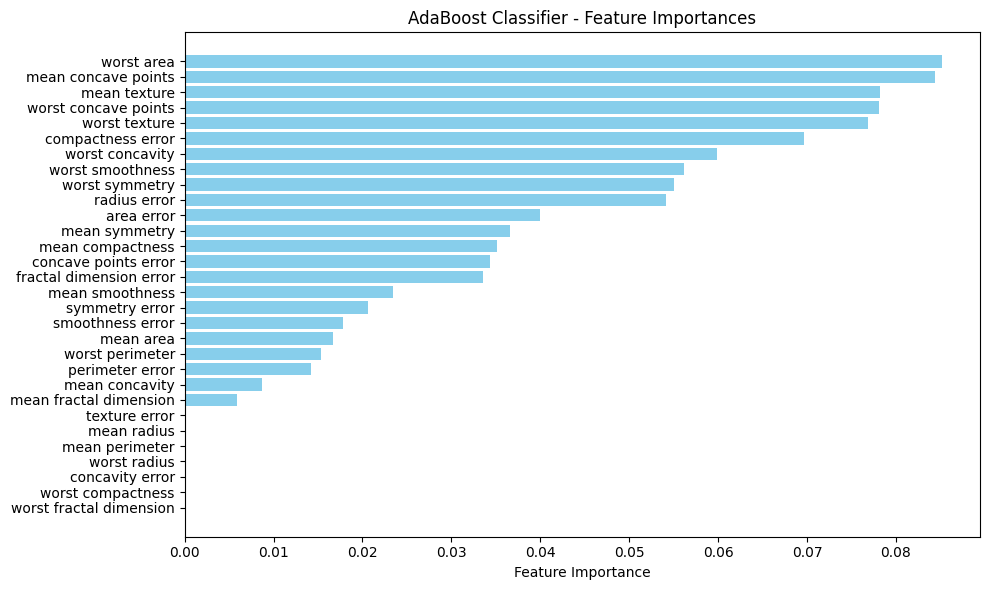

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Get feature importances
importances = ada.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("AdaBoost Classifier - Feature Importances")
plt.tight_layout()
plt.show()


22. Train a Gradient Boosting Regressor and plot learning curves

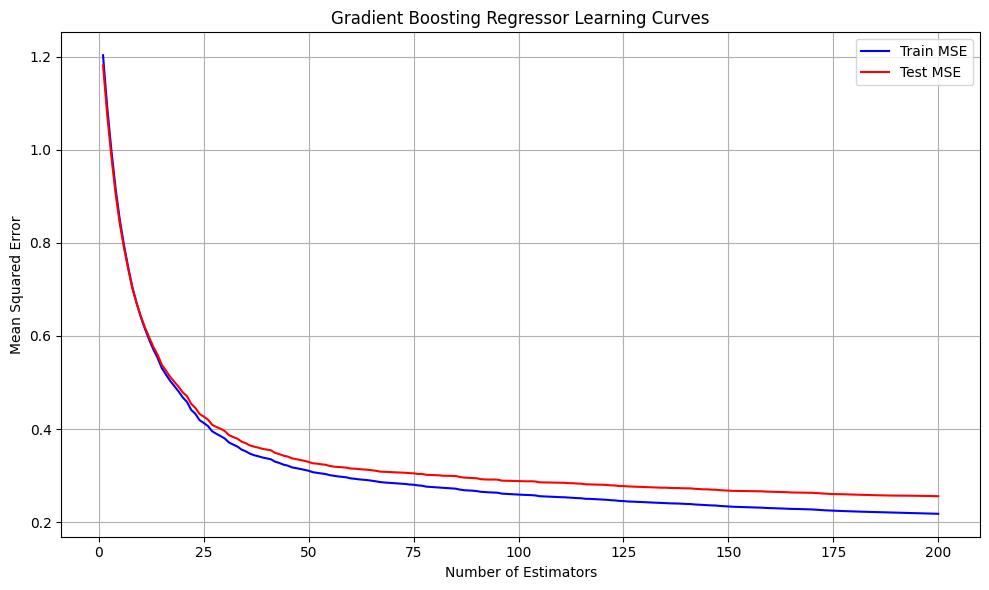

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Compute staged predictions (for learning curve)
train_errors = []
test_errors = []

for y_train_pred in gbr.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_train_pred))

for y_test_pred in gbr.staged_predict(X_test):
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_errors) + 1), train_errors, label="Train MSE", color='blue')
plt.plot(np.arange(1, len(test_errors) + 1), test_errors, label="Test MSE", color='red')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


23. Train an XGBoost Classifier and visualize feature importance.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:08:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x600 with 0 Axes>

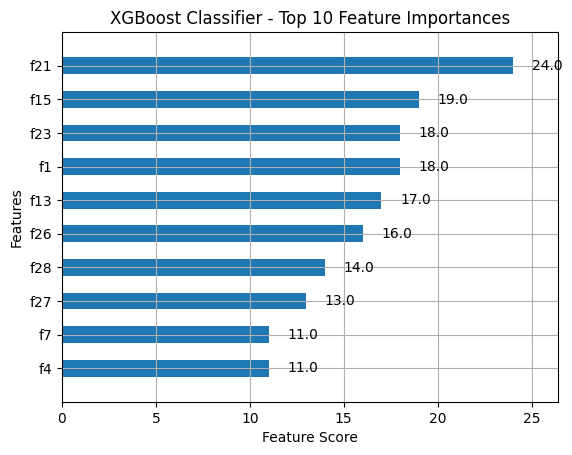

In [13]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plot_importance(model, importance_type='weight', xlabel='Feature Score', height=0.5, max_num_features=10)
plt.title("XGBoost Classifier - Top 10 Feature Importances")
plt.show()


24. Train a CatBoost Classifier and plot the confusion matrix.

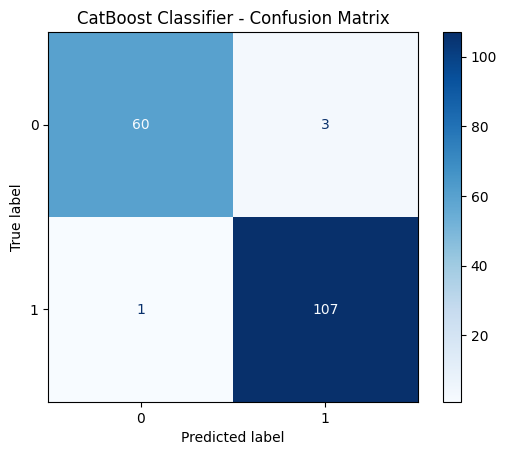

In [14]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()


25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

AdaBoost Accuracy with 10 estimators: 0.9766
AdaBoost Accuracy with 50 estimators: 0.9708
AdaBoost Accuracy with 100 estimators: 0.9708
AdaBoost Accuracy with 150 estimators: 0.9766
AdaBoost Accuracy with 200 estimators: 0.9825


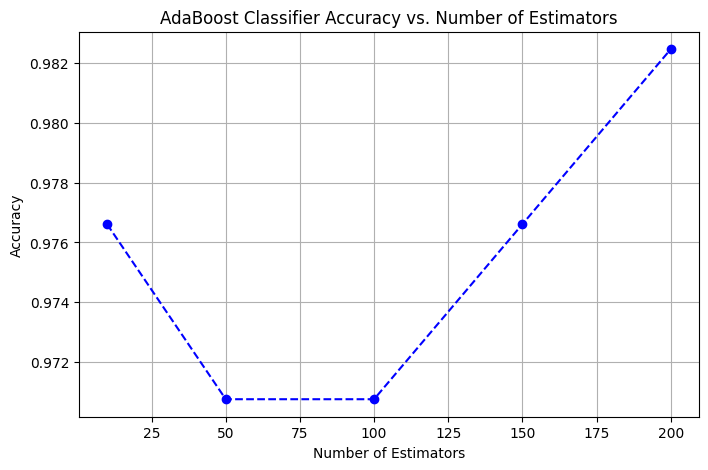

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different values of n_estimators to try
n_estimators_list = [10, 50, 100, 150, 200]
accuracies = []

# Train AdaBoost for each n_estimators
for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"AdaBoost Accuracy with {n} estimators: {acc:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='blue')
plt.title('AdaBoost Classifier Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


26. Train a Gradient Boosting Classifier and visualize the ROC curve.

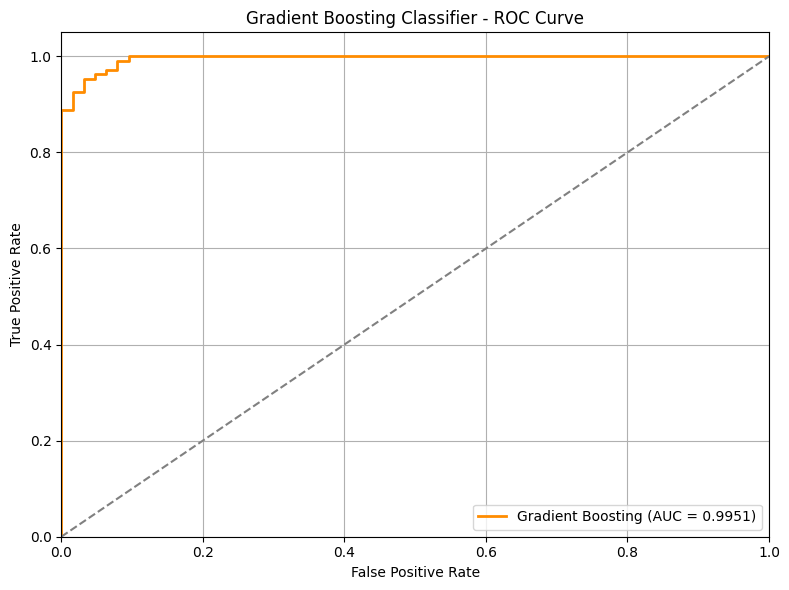

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [20]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Initialize model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])

# Evaluate on test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.2
Test Mean Squared Error: 0.21527726173922382


28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [19]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter

# Generate imbalanced classification dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2,
                           n_redundant=10, weights=[0.9, 0.1], random_state=42)

# Show class distribution
print("Class distribution:", Counter(y))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -------------------------------
# 1. Train without class weights
# -------------------------------
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
f1_no_weights = f1_score(y_test, y_pred_no_weights)
print("F1 Score without class weights:", f1_no_weights)

# -------------------------------
# 2. Train with class weights
# -------------------------------
# Compute class weights manually
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i : w for i, w in zip(classes, weights)}
print("Class Weights:", class_weights_dict)

# Train CatBoost with class_weights
model_with_weights = CatBoostClassifier(verbose=0, random_state=42, class_weights=class_weights_dict)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)
f1_with_weights = f1_score(y_test, y_pred_with_weights)
print("F1 Score with class weights:", f1_with_weights)


Class distribution: Counter({np.int64(0): 1793, np.int64(1): 207})
F1 Score without class weights: 0.7131782945736435
Class Weights: {np.int64(0): np.float64(0.5577689243027888), np.int64(1): np.float64(4.827586206896552)}
F1 Score with class weights: 0.7210884353741497


29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

Learning Rate: 0.01 → Accuracy: 0.9415
Learning Rate: 0.05 → Accuracy: 0.9591
Learning Rate: 0.10 → Accuracy: 0.9591
Learning Rate: 0.50 → Accuracy: 0.9649
Learning Rate: 1.00 → Accuracy: 0.9708
Learning Rate: 1.50 → Accuracy: 0.9708
Learning Rate: 2.00 → Accuracy: 0.9064


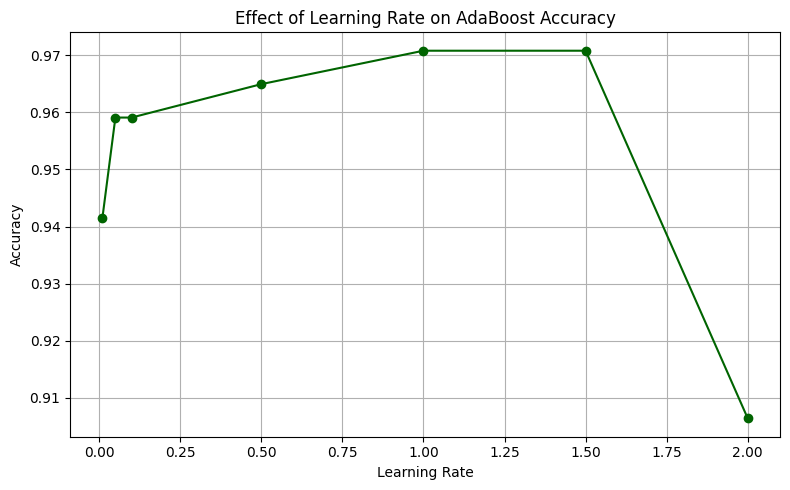

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0]
accuracies = []

# Train and evaluate AdaBoost for each learning rate
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr:.2f} → Accuracy: {acc:.4f}")

# Plot accuracy vs learning rate
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='darkgreen')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [17]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load multi-class classification dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost Classifier for multi-class
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predict class probabilities
y_proba = model.predict_proba(X_test)

# Compute multi-class log-loss
loss = log_loss(y_test, y_proba)
print(f"Multi-class Log Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Multi-class Log Loss: 0.2573
